## ***Feature Selection-Forward Selected Features***

Data Loading and Preprocessing:

Loads a dataset from a CSV file (FWSelection.csv).
Separates features (X) and the target variable (y).
Scales the features using StandardScaler for better model performance.

Model Selection and Training:

Initializes several classifiers: Decision Tree, Random Forest, SVM, Neural Network (MLPClassifier), and K-Nearest Neighbors.
Uses stratified 10-fold cross-validation to evaluate each classifier's performance.

Performance Evaluation and Visualization:

Calculates metrics like accuracy, precision, recall, and F1-score for each classifier.
Generates confusion matrices to visualize prediction accuracy.
Plots ROC curves for selected classifiers to assess their ability to distinguish between classes.
Creates a bar plot to compare the accuracy of different classifiers.
Prints cross-validation results, including accuracy, precision, recall, and F1-score.
Identifies the best classifier based on cross-validation accuracy.
Results Interpretation

Cross-Validation Results:

The code provides the average performance of each classifier across the 10 folds, giving insights into their overall generalization ability.
Confusion Matrices: These matrices show the counts of true positives, true negatives, false positives, and false negatives, helping assess the types of errors made by each classifier.
ROC Curves: The ROC curves illustrate the trade-off between true positive rate and false positive rate for different classification thresholds. The area under the curve (AUC) represents the classifier's overall performance.

Accuracy Bar Plot: This plot provides a visual comparison of the accuracy scores achieved by each classifier.

Best Classifier: The code identifies the best classifier based on cross-validation accuracy, providing guidance on which model might be most suitable for the task.

Addressing mlp_clf.loss_curve_:

This attribute of the MLPClassifier stores the loss values during training.
The code plots this loss curve, which shows how the training loss decreases over iterations, indicating the model's learning progress.
Observing this curve can help identify potential issues like overfitting or slow convergence.

## Feature extration from feature selection: Selected Feature from Forward Selected Features

In [ ]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import NumPy for numerical operations
import os  # Import os for directory operations
import re  # Import re for regular expressions

# Define the path to the concatenated feature CSV file
input_directory = '/content/drive/MyDrive/Colab Notebooks/FEDM/concatenated_data.csv'  # Path to the CSV file

# List of features to extract, including 'Class_Label' as specified
features_to_extract = ['StdDev', 'Mean', 'Skewness', 'Class_Label', 'Kurtosis', 'Energy']  # Specify the features of interest

# Read the concatenated CSV file into a DataFrame
df = pd.read_csv(input_directory)  # Read the CSV file into a DataFrame

# Verify that each feature exists in the DataFrame columns
existing_features = [feature for feature in features_to_extract if feature in df.columns]
if not existing_features:
    print("None of the specified features are present in the DataFrame.")
else:
    # Extract only the specified features
    extracted_features = df[existing_features]  # Select only the available specified features

    # Rename the DataFrame's index to the filename (if applicable) and keep only the numerical part
    numerical_filename = re.search(r'\d+', os.path.basename(input_directory))  # Extract numerical part from the filename
    if numerical_filename:  # Check if a number was found
        extracted_features['filename'] = numerical_filename.group()  # Add the numerical part as the filename

    # Define the output file path including filename
    output_file_path = '/content/drive/MyDrive/Colab Notebooks/FEDM/final_dataframe.csv'

    # Save the final DataFrame to a new CSV file
    extracted_features.to_csv(output_file_path, index=False)  # Save the extracted features to a CSV file without the index

    print("Extraction completed and saved to:", output_file_path)  # Print completion message


Extraction completed and saved to: /content/drive/MyDrive/Colab Notebooks/FEDM/final_dataframe.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Classifier-DT, KNN , Random Forest, SVM, NN-MPTL

## Step 1: Import necessary libraries and load the dataset

In [ ]:

import warnings  # To handle warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)  # Ignore undefined metric warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)  # Ignore convergence warnings

import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
from tqdm import tqdm  # For progress bars

# Load dataset as a DataFrame
csv_file = '/content/drive/MyDrive/Colab Notebooks/FEDM/FWSelection.csv'  # Path to the dataset
data = pd.read_csv(csv_file)  # Read CSV file into a DataFrame

## Step 2: Prepare data for modeling

In [ ]:

X = data.drop('Class_Label', axis=1)  # Separate features (X) by dropping the target variable
y = data['Class_Label']  # Target variable (y)

# Feature scaling to standardize features
scaler = StandardScaler()  # Initialize the StandardScaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Initialize classifiers for comparison
classifiers = {
    "DecisionTree": DecisionTreeClassifier(random_state=0),
    "RandomForest": RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=-1, random_state=0),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=0),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0, learning_rate_init=0.0005, alpha=0.001),
    "KNN_2": KNeighborsClassifier(n_neighbors=2)
}

# Custom class labels for confusion matrix
class_labels = sorted(y.unique())  # Get sorted unique class labels for later use


### Step 3: Model evaluation and metrics calculation


Evaluating DecisionTree with 10-fold cross-validation...
Cross-Validation Results for DecisionTree:
  Accuracy: 0.8617
  Precision: 0.8751
  Recall (Sensitivity): 0.8617
  F1-Score: 0.8607


Metrics for DecisionTree:
Accuracy: 0.9980
Precision: 0.9980
Sensitivity (Recall): 0.9980
Specificity: 0.9980
F1-Score: 0.9980


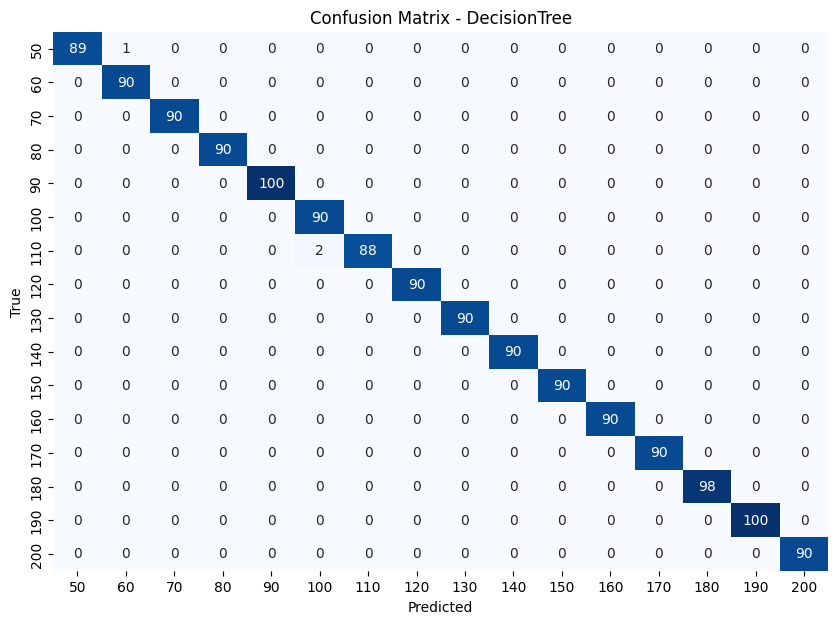


Evaluating RandomForest with 10-fold cross-validation...
Cross-Validation Results for RandomForest:
  Accuracy: 0.8747
  Precision: 0.8914
  Recall (Sensitivity): 0.8747
  F1-Score: 0.8744


Metrics for RandomForest:
Accuracy: 0.9980
Precision: 0.9980
Sensitivity (Recall): 0.9980
Specificity: 0.9980
F1-Score: 0.9980


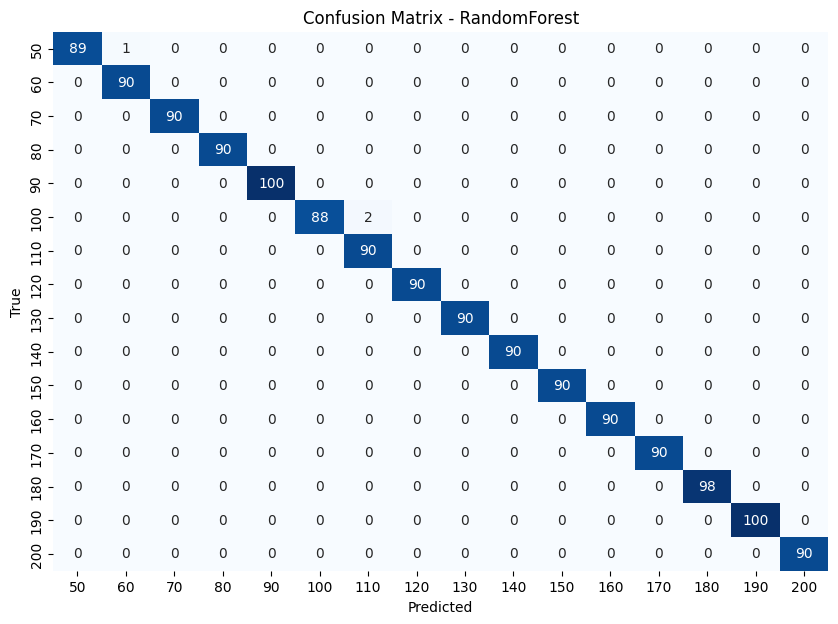


Evaluating SVM with 10-fold cross-validation...
Cross-Validation Results for SVM:
  Accuracy: 0.1179
  Precision: 0.3190
  Recall (Sensitivity): 0.1179
  F1-Score: 0.0981


Metrics for SVM:
Accuracy: 0.1628
Precision: 0.7506
Sensitivity (Recall): 0.1628
Specificity: 0.1628
F1-Score: 0.1725


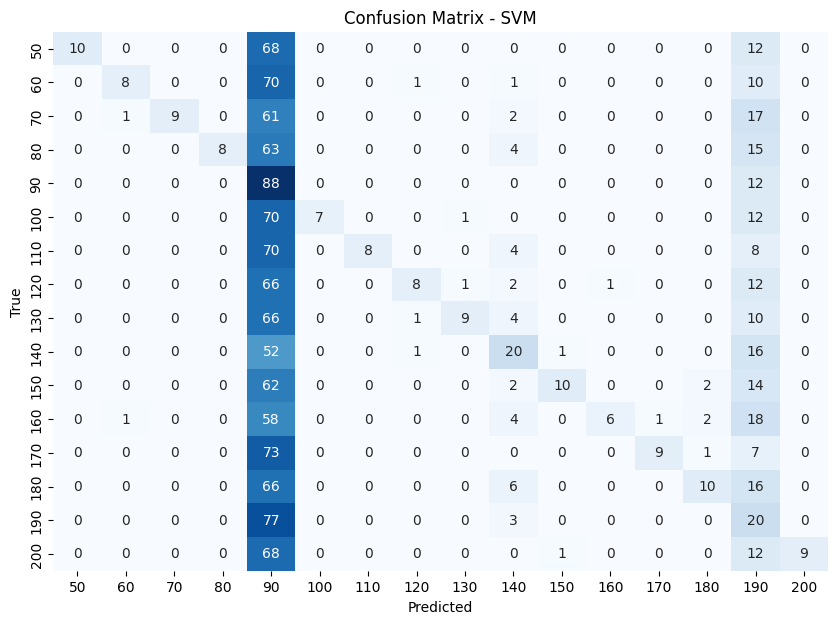


Evaluating NeuralNetwork with 10-fold cross-validation...
Cross-Validation Results for NeuralNetwork:
  Accuracy: 0.1921
  Precision: 0.2087
  Recall (Sensitivity): 0.1921
  F1-Score: 0.1801


Metrics for NeuralNetwork:
Accuracy: 0.3059
Precision: 0.3637
Sensitivity (Recall): 0.3059
Specificity: 0.3059
F1-Score: 0.3018


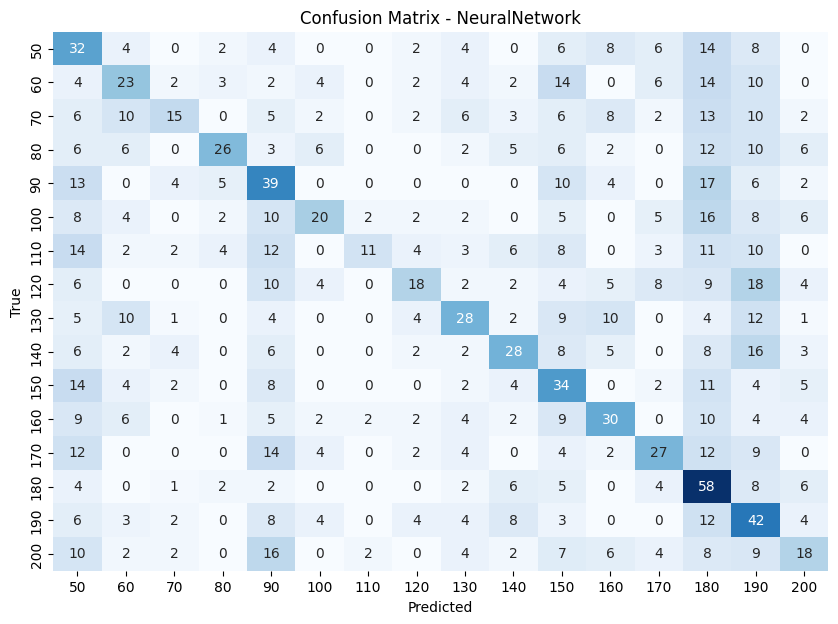


Evaluating KNN_2 with 10-fold cross-validation...
Cross-Validation Results for KNN_2:
  Accuracy: 0.4952
  Precision: 0.5216
  Recall (Sensitivity): 0.4952
  F1-Score: 0.4687


Metrics for KNN_2:
Accuracy: 0.9693
Precision: 0.9701
Sensitivity (Recall): 0.9693
Specificity: 0.9693
F1-Score: 0.9694


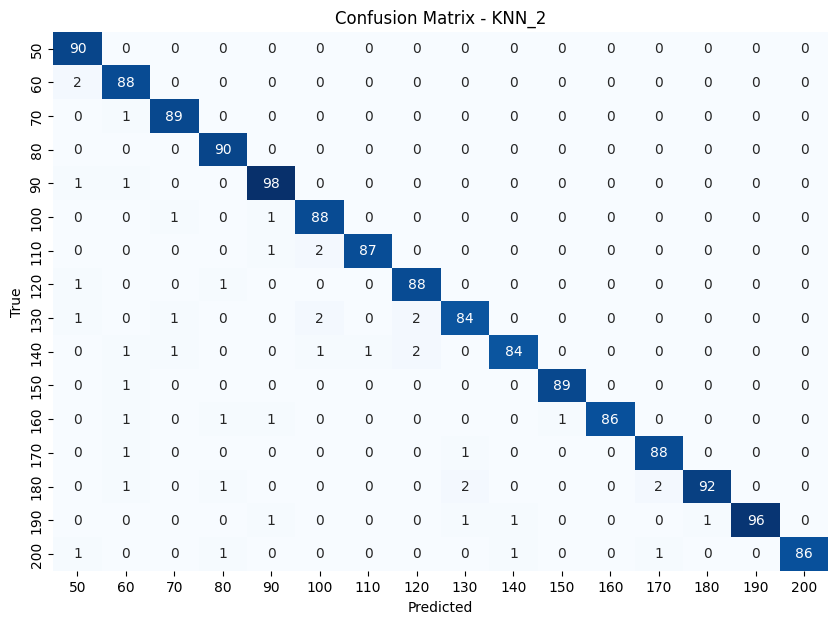

Best classifier based on cross-validation: RandomForest with accuracy 0.8747


In [ ]:

# Function to calculate and display metrics
def print_metrics(y_test, y_pred, clf_name):
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred, average="weighted")  # Calculate precision
    sensitivity = recall_score(y_test, y_pred, average="weighted")  # Calculate recall (sensitivity)
    specificity = np.sum(cm.diagonal()) / np.sum(cm)  # Calculate specificity
    f1 = f1_score(y_test, y_pred, average="weighted")  # Calculate F1-Score

    # Print metrics
    print(f"\nMetrics for {clf_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion matrix visualization
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return accuracy, precision, sensitivity, specificity, f1

# Stratified K-Fold for balanced cross-validation
n_folds = 10  # Number of folds for cross-validation
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)  # Initialize K-Fold

# Evaluate classifiers using cross-validation
cv_results = {}  # Dictionary to store cross-validation results
best_classifier = {"name": None, "accuracy": 0}  # To keep track of the best classifier

for clf_name, clf in classifiers.items():  # Loop through each classifier
    print(f"\nEvaluating {clf_name} with {n_folds}-fold cross-validation...")

    # Cross-validation scores for different metrics
    accuracy_scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='precision_weighted')
    recall_scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='recall_weighted')
    f1_scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='f1_weighted')

    # Store results
    cv_results[clf_name] = {
        "accuracy": np.mean(accuracy_scores),
        "precision": np.mean(precision_scores),
        "recall": np.mean(recall_scores),
        "f1_score": np.mean(f1_scores)
    }

    # Print cross-validation results for the classifier
    print(f"Cross-Validation Results for {clf_name}:")
    print(f"  Accuracy: {cv_results[clf_name]['accuracy']:.4f}")
    print(f"  Precision: {cv_results[clf_name]['precision']:.4f}")
    print(f"  Recall (Sensitivity): {cv_results[clf_name]['recall']:.4f}")
    print(f"  F1-Score: {cv_results[clf_name]['f1_score']:.4f}\n")

    # Update the best classifier based on accuracy
    if cv_results[clf_name]["accuracy"] > best_classifier["accuracy"]:
        best_classifier = {"name": clf_name, "accuracy": cv_results[clf_name]["accuracy"]}

    # Fit the classifier on the entire dataset for confusion matrix plot
    clf.fit(X_scaled, y)  # Train the classifier
    y_pred = clf.predict(X_scaled)  # Predict on the scaled data
    print_metrics(y, y_pred, clf_name)  # Print metrics and plot confusion matrix

print(f"Best classifier based on cross-validation: {best_classifier['name']} with accuracy {best_classifier['accuracy']:.4f}")


## Step 3: ROC curve plotting and accuracy visualization


Top 3 Classifiers based on Mean Accuracy:

Rank 1: RandomForest
  Accuracy: 0.8747
  Precision: 0.8914
  Recall (Sensitivity): 0.8747
  F1-Score: 0.8744

Rank 2: DecisionTree
  Accuracy: 0.8617
  Precision: 0.8751
  Recall (Sensitivity): 0.8617
  F1-Score: 0.8607

Rank 3: KNN_2
  Accuracy: 0.4952
  Precision: 0.5216
  Recall (Sensitivity): 0.4952
  F1-Score: 0.4687


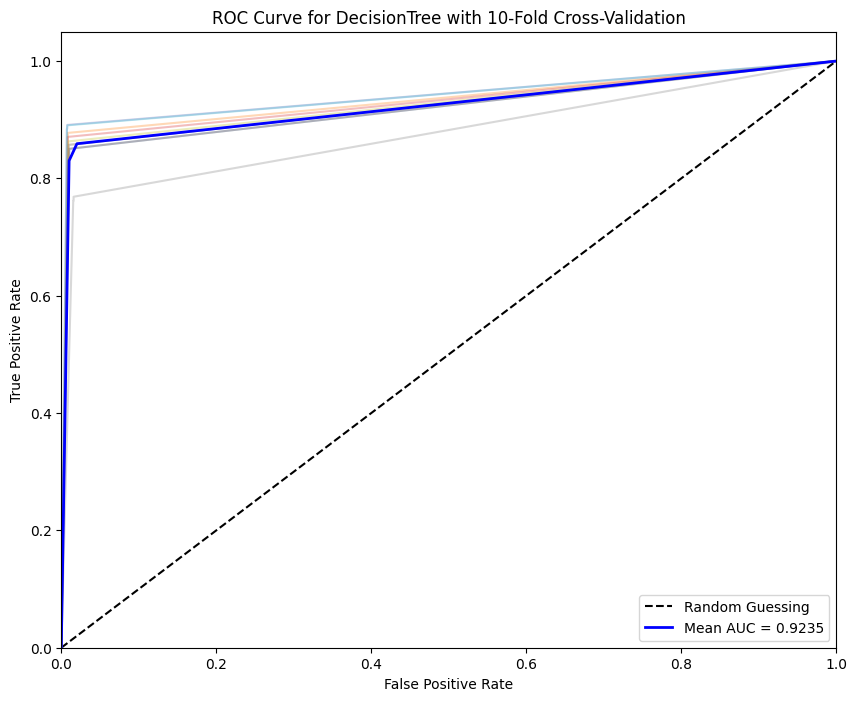

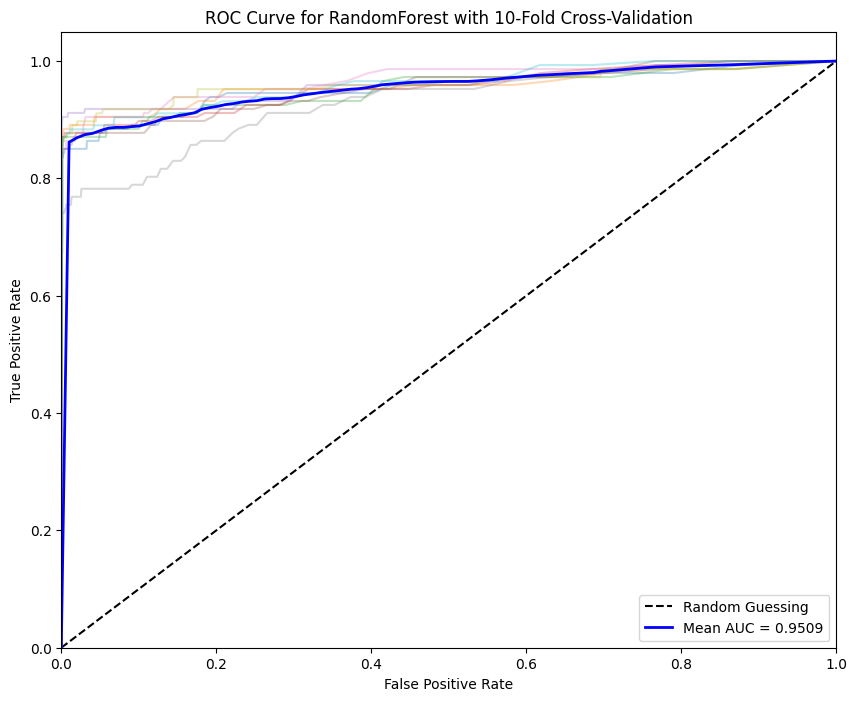


Best Classifier Results:
Classifier: RandomForest
Accuracy: 0.8747


In [ ]:

# Sort classifiers based on mean accuracy in descending order
sorted_classifiers = sorted(cv_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

# Display the top 3 classifiers
print("\nTop 3 Classifiers based on Mean Accuracy:")
for i, (clf_name, scores) in enumerate(sorted_classifiers[:3], start=1):
    print(f"\nRank {i}: {clf_name}")
    print(f"  Accuracy: {scores['accuracy']:.4f}")
    print(f"  Precision: {scores['precision']:.4f}")
    print(f"  Recall (Sensitivity): {scores['recall']:.4f}")
    print(f"  F1-Score: {scores['f1_score']:.4f}")

# Plotting ROC curves for selected classifiers
selected_classifiers = {
    "DecisionTree": classifiers["DecisionTree"],
    "RandomForest": classifiers["RandomForest"]
}

# Number of folds for cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)  # Initialize Stratified K-Fold

for clf_name, clf in selected_classifiers.items():
    plt.figure(figsize=(10, 8))  # Initialize figure for ROC curve
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Baseline line for random guessing
    plt.title(f'ROC Curve for {clf_name} with {n_folds}-Fold Cross-Validation')  # Title for the plot
    plt.xlabel('False Positive Rate')  # X-axis label
    plt.ylabel('True Positive Rate')  # Y-axis label

    mean_fpr = np.linspace(0, 1, 100)  # Define mean false positive rate
    tprs, aucs = [], []  # Initialize lists for true positive rates and AUC values

    # Stratified K-Folds cross-validation for ROC curve
    for train_index, test_index in skf.split(X_scaled, y):
        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]  # Split data
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]  # Split labels

        # Fit the classifier on the training fold
        clf.fit(X_train_fold, y_train_fold)  # Train the classifier on the training data

        # Calculate ROC curve and AUC
        if hasattr(clf, "predict_proba"):  # If the classifier has predict_proba method
            y_proba = clf.predict_proba(X_test_fold)  # Get predicted probabilities
            if len(np.unique(y)) == 2:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test_fold, y_proba[:, 1])  # Calculate ROC for positive class
            else:  # Multi-class classification
                y_test_binarized = label_binarize(y_test_fold, classes=np.unique(y))  # Binarize labels
                fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_proba.ravel())  # Calculate ROC for multi-class
        elif hasattr(clf, "decision_function"):  # If the classifier has decision_function method
            y_score = clf.decision_function(X_test_fold)  # Get decision scores
            if len(np.unique(y)) == 2:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test_fold, y_score)  # Calculate ROC for binary
            else:  # Multi-class classification
                y_test_binarized = label_binarize(y_test_fold, classes=np.unique(y))  # Binarize labels
                fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())  # Calculate ROC for multi-class
        else:
            print(f"{clf_name} does not support ROC plotting.")  # Warning for unsupported classifiers
            continue

        # Interpolated TPR for consistent mean ROC curve
        interp_tpr = np.interp(mean_fpr, fpr, tpr)  # Interpolate TPR
        interp_tpr[0] = 0.0  # Ensure the first point is 0
        tprs.append(interp_tpr)  # Append interpolated TPR
        aucs.append(auc(fpr, tpr))  # Append AUC

        # Individual ROC curve for each fold
        plt.plot(fpr, tpr, alpha=0.3)  # Plot individual ROC curves

    # Plot mean ROC curve across folds
    mean_tpr = np.mean(tprs, axis=0)  # Calculate mean TPR
    mean_tpr[-1] = 1.0  # Ensure end of TPR is 1.0
    mean_auc = auc(mean_fpr, mean_tpr)  # Calculate mean AUC
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean AUC = {mean_auc:.4f}', lw=2)  # Plot mean ROC curve

    # Finalize plot with legend and axis limits
    plt.legend(loc="lower right")  # Add legend
    plt.xlim([0.0, 1.0])  # Set x-axis limits
    plt.ylim([0.0, 1.05])  # Set y-axis limits
    plt.show()  # Show the plot

# Output the name and accuracy of the best-performing classifier
print("\nBest Classifier Results:")
print(f"Classifier: {best_classifier['name']}")
print(f"Accuracy: {best_classifier['accuracy']:.4f}")

### Plotting Accuracy Bar Plot for Each Classifier

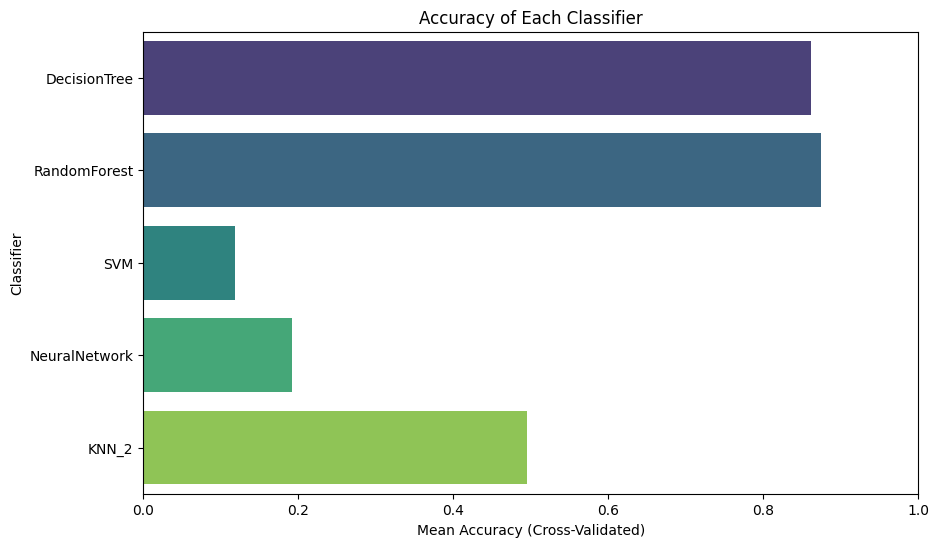

In [ ]:
# Plotting Accuracy Bar Plot for Each Classifier

# Extract classifier names and their corresponding accuracy scores
classifier_names = list(cv_results.keys())
accuracy_scores = [cv_results[clf]["accuracy"] for clf in classifier_names]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=classifier_names, hue=classifier_names, palette="viridis", dodge=False, legend=False)

# Customize plot
plt.title("Accuracy of Each Classifier")
plt.xlabel("Mean Accuracy (Cross-Validated)")
plt.ylabel("Classifier")
plt.xlim(0, 1)  # Set limit to 1 since accuracy ranges from 0 to 1
plt.show()


## Initialize MLPClassifier with parameters that ensure the loss curve is recorded

Iteration 1, loss = 2.81258766
Iteration 2, loss = 2.79358713
Iteration 3, loss = 2.78048883
Iteration 4, loss = 2.76968250
Iteration 5, loss = 2.76071200
Iteration 6, loss = 2.75271203
Iteration 7, loss = 2.74611240
Iteration 8, loss = 2.74004686
Iteration 9, loss = 2.73489610
Iteration 10, loss = 2.73024401
Iteration 11, loss = 2.72611895
Iteration 12, loss = 2.72212913
Iteration 13, loss = 2.71858230
Iteration 14, loss = 2.71545174
Iteration 15, loss = 2.71241777
Iteration 16, loss = 2.71002434
Iteration 17, loss = 2.70746675
Iteration 18, loss = 2.70534105
Iteration 19, loss = 2.70300393
Iteration 20, loss = 2.70098234
Iteration 21, loss = 2.69929673
Iteration 22, loss = 2.69732388
Iteration 23, loss = 2.69523898
Iteration 24, loss = 2.69354784
Iteration 25, loss = 2.69190972
Iteration 26, loss = 2.69016137
Iteration 27, loss = 2.68860863
Iteration 28, loss = 2.68685308
Iteration 29, loss = 2.68539214
Iteration 30, loss = 2.68381586
Iteration 31, loss = 2.68220644
Iteration 32, los

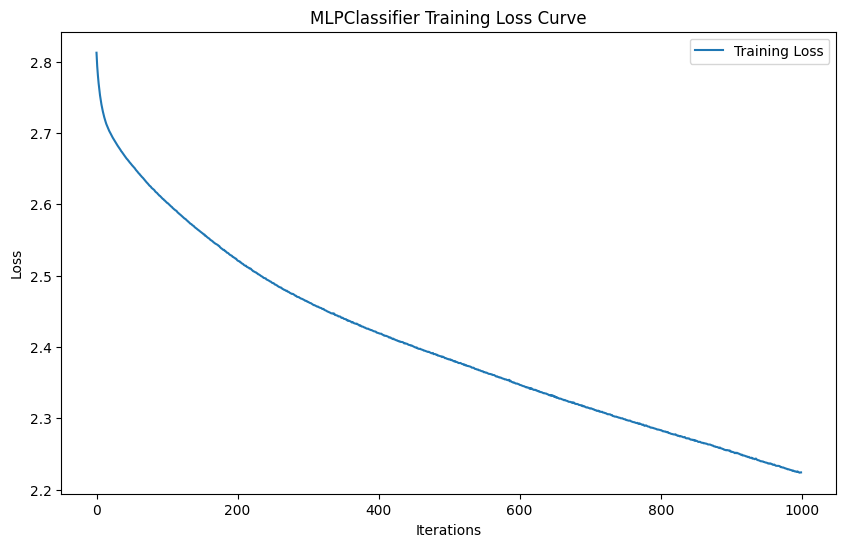

In [ ]:
# Initialize MLPClassifier with parameters that ensure the loss curve is recorded
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=0,
    learning_rate_init=0.0005,
    alpha=0.001,
    verbose=True  # Enables printing progress, including the loss curve tracking
)

# Fit the classifier on the scaled data
mlp_clf.fit(X_scaled, y)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_clf.loss_curve_, label="Training Loss")
plt.title("MLPClassifier Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
